In [77]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from numpy.lib.stride_tricks import as_strided
import PIL
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import json
import os
from itertools import product
import itertools
import random
import glob
from pathlib import Path
from datetime import datetime
import datetime
from matplotlib.colors import Normalize


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [78]:
if "google.colab" in str(get_ipython()):
    from google.colab.patches import cv2_imshow

    imshow = cv2_imshow
else:

    def imshow(img):
        img = img.clip(0, 255).astype("uint8")
        if img.ndim == 3:
            if img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display(PIL.Image.fromarray(img))

In [79]:
def h_color(a, interpolation=None, size=None, fy=1.5, fx=1.5, cmap="gray"):
    s = [int(a.shape[0] * fy), int(a.shape[1] * fx)] if size is None else size
    plt.figure(figsize=s)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        labelleft=False,
        left=False,
        right=False,
    )
    plt.imshow(a, cmap=cmap, interpolation=interpolation)

In [80]:
css = """
<style type="text/css">
  table, td, table.dataframe, table.dataframe td {
    border: 1px solid black;    //border: double;
    border-collapse: collapse;
    border-style: solid;
    border-spacing: 0px;
    background-color: rgb(250,250,250);
    width: 24px;
    height: 24px;
    text-align: center;
    transform: scale(1.0);
    margin: 5px;
    }
</style>
"""


def h(s):
    return display(HTML(css + DataFrame(s).to_html(header=False, index=False)))

In [81]:
def h_color_3d(z):
    fig = go.Figure(data=[go.Surface(z=z)])
    fig.update_layout(autosize=False, width=500, height=500)
    fig.show()

### **Load Data**

### 1st Range : 090422 - 090612

In [82]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '090422'
end = '090612'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [83]:
dx= 5.106500953873407 
dt= 0.0016

data1 = []
first_filename = selected[0]
for file in selected:
   data1.append(np.load(file))
data1 = np.concatenate(data1)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data1), freq=f'{dt}s')
columns = np.arange(len(data1[0])) * dx
df1 = pd.DataFrame(data=data1, index=index, columns=columns)

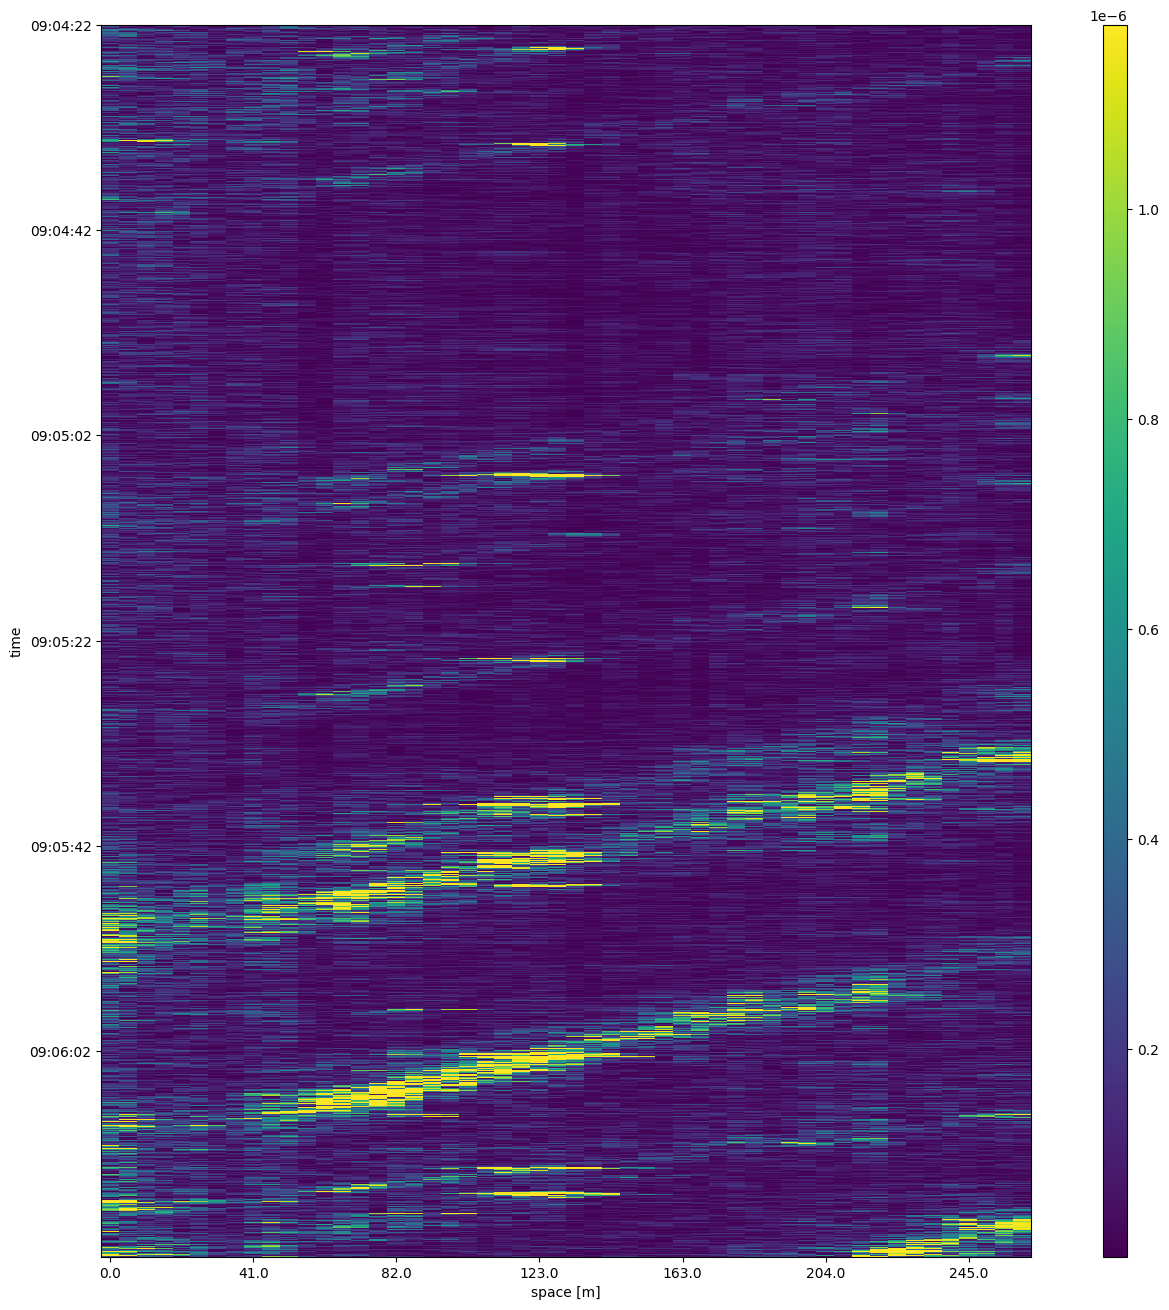

In [84]:


fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df1 -= df1.mean()
df1 = np.abs(df1) 
low, high = np.percentile(df1, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df1,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df1.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df1.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


### 2nd Range : 091152 - 091342

In [85]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '091152'
end = '091342'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [86]:
data2 = []
first_filename = selected[0]
for file in selected:
   data2.append(np.load(file))
data2 = np.concatenate(data2)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data2), freq=f'{dt}s')
columns = np.arange(len(data2[0])) * dx
df2 = pd.DataFrame(data=data2, index=index, columns=columns)

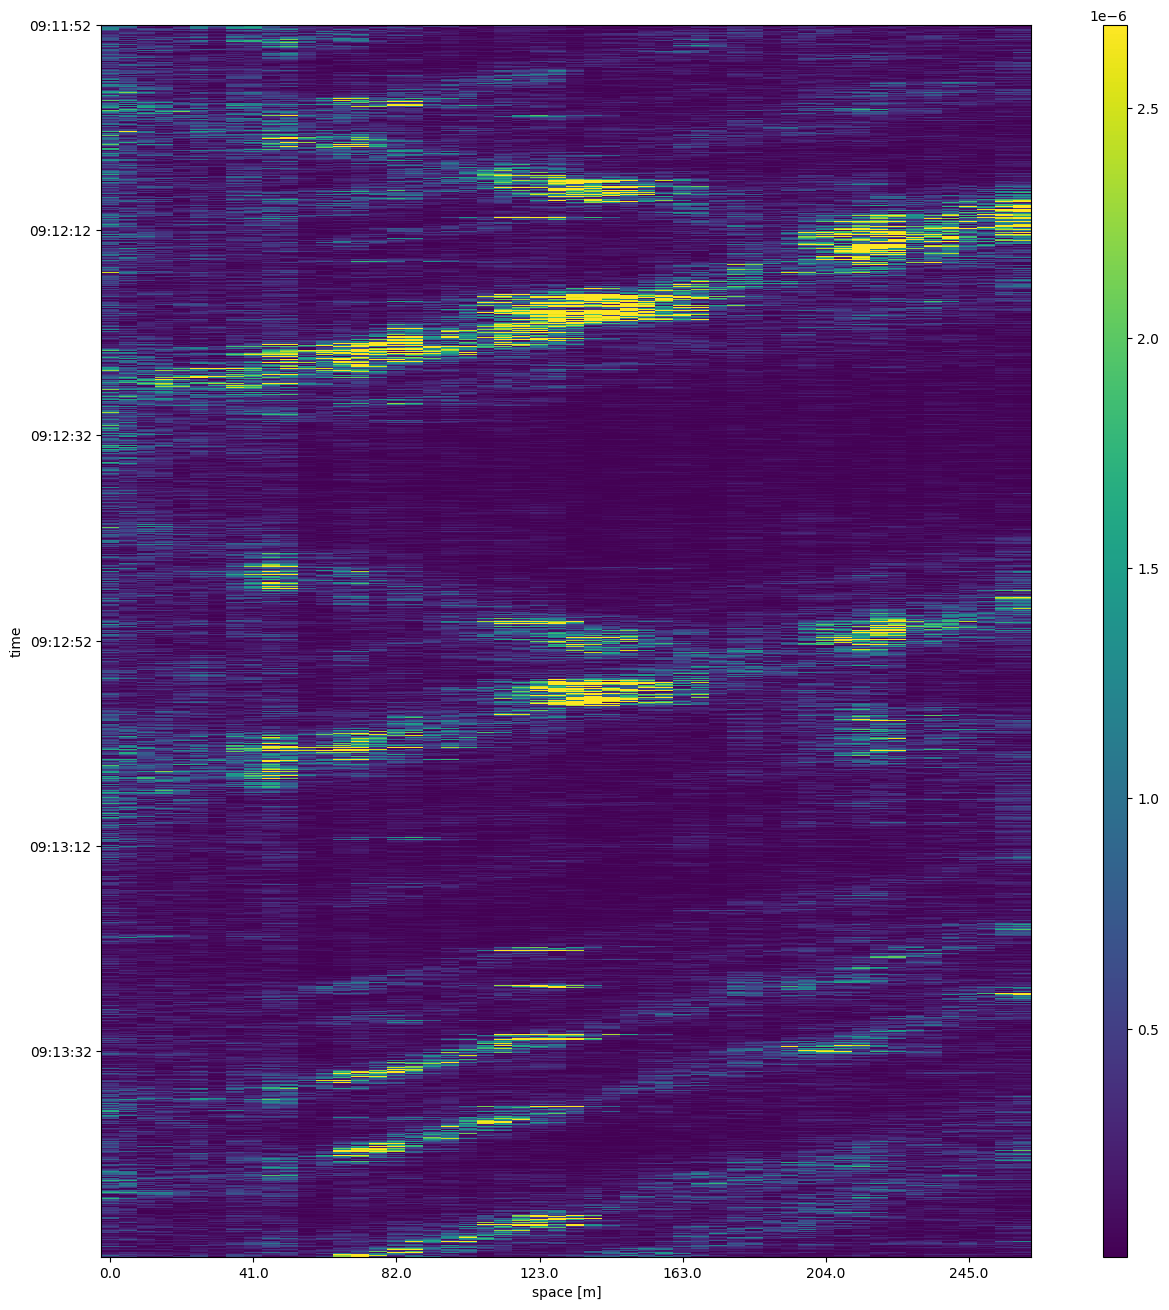

In [87]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df2 -= df2.mean()
df2 = np.abs(df2) 
low, high = np.percentile(df2, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df2,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df2.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df2.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### 3rd Range : 094122 - 094312

In [88]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '094122'
end = '094312'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [89]:
data3 = []
first_filename = selected[0]
for file in selected:
   data3.append(np.load(file))
data3 = np.concatenate(data3)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data3), freq=f'{dt}s')
columns = np.arange(len(data3[0])) * dx
df3 = pd.DataFrame(data=data3, index=index, columns=columns)

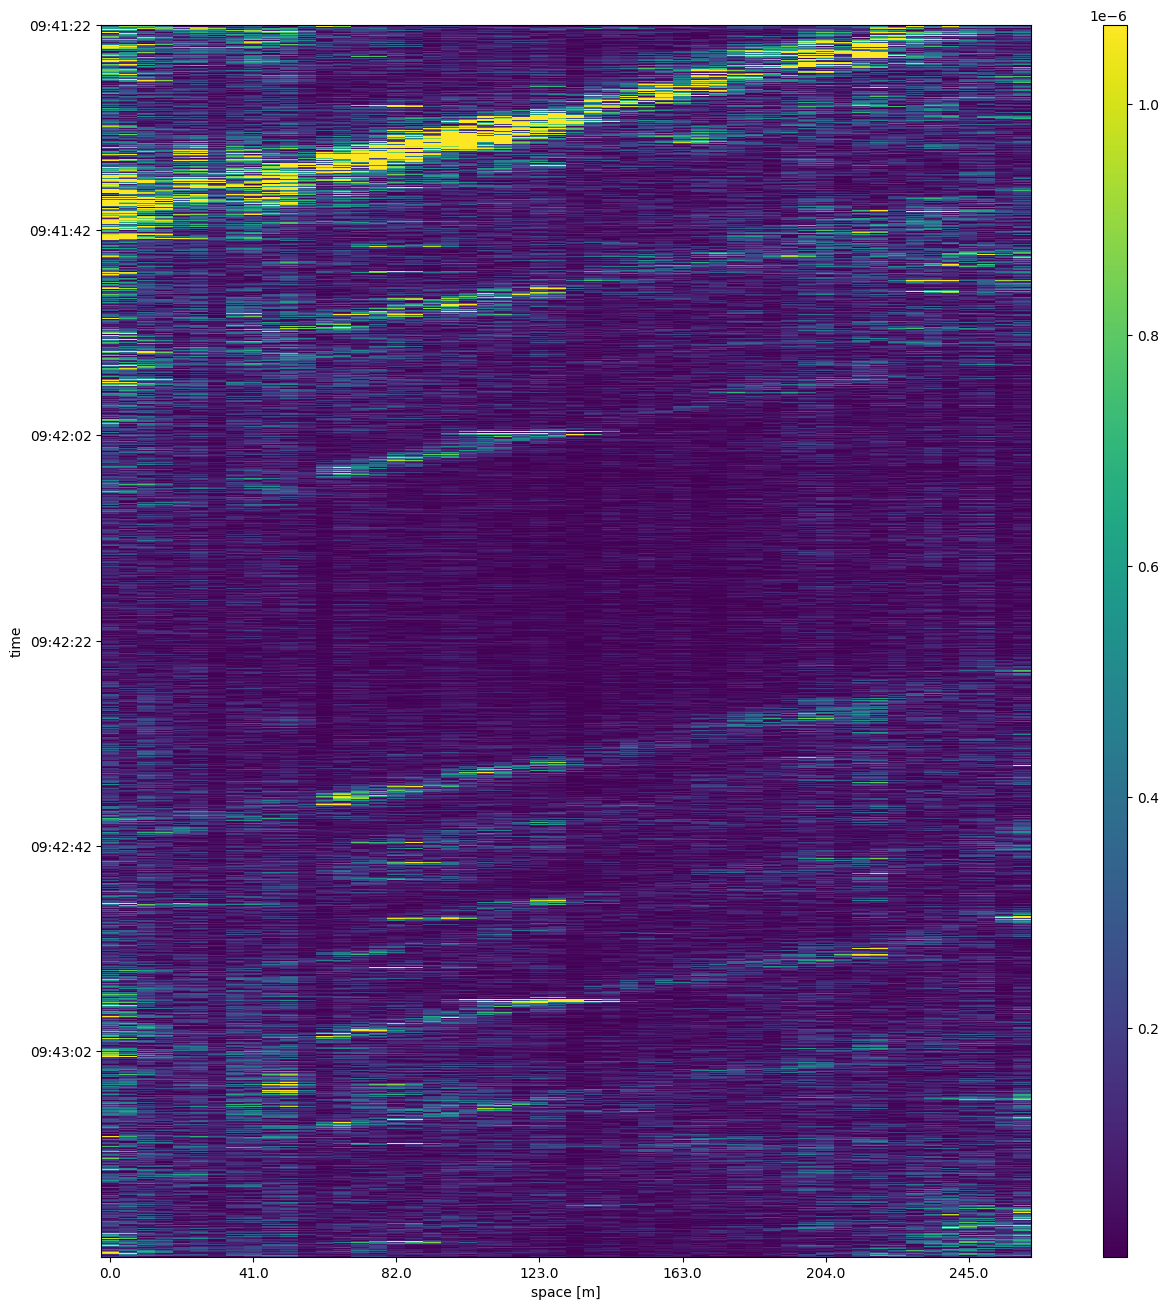

In [90]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df3 -= df3.mean()
df3 = np.abs(df3) 
low, high = np.percentile(df3, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df3,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df3.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df3.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

In [91]:
os.makedirs('../images', exist_ok=True)

images_data = [
    (df1.values, 'range1_090422-090612.png'),
    (df2.values, 'range2_091152-091342.png'),
    (df3.values, 'range3_094122-094312.png')
]

for data, filename in images_data:
    low, high = np.percentile(data, [3, 99])
    norm = Normalize(vmin=low, vmax=high, clip=True)
    data_normalized = norm(data)
    
    cmap = plt.cm.viridis
    img_colored = (cmap(data_normalized)[:, :, :3] * 255).astype(np.uint8)
    img_colored_bgr = cv2.cvtColor(img_colored, cv2.COLOR_RGB2BGR)
    
    new_height = 1600
    new_width = int(new_height * 12 / 16)
    img_resized = cv2.resize(img_colored_bgr, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
    cv2.imwrite(f'../images/{filename}', img_resized)
    print(f'✓ {filename}: {img_resized.shape}')

✓ range1_090422-090612.png: (1600, 1200, 3)
✓ range2_091152-091342.png: (1600, 1200, 3)
✓ range3_094122-094312.png: (1600, 1200, 3)


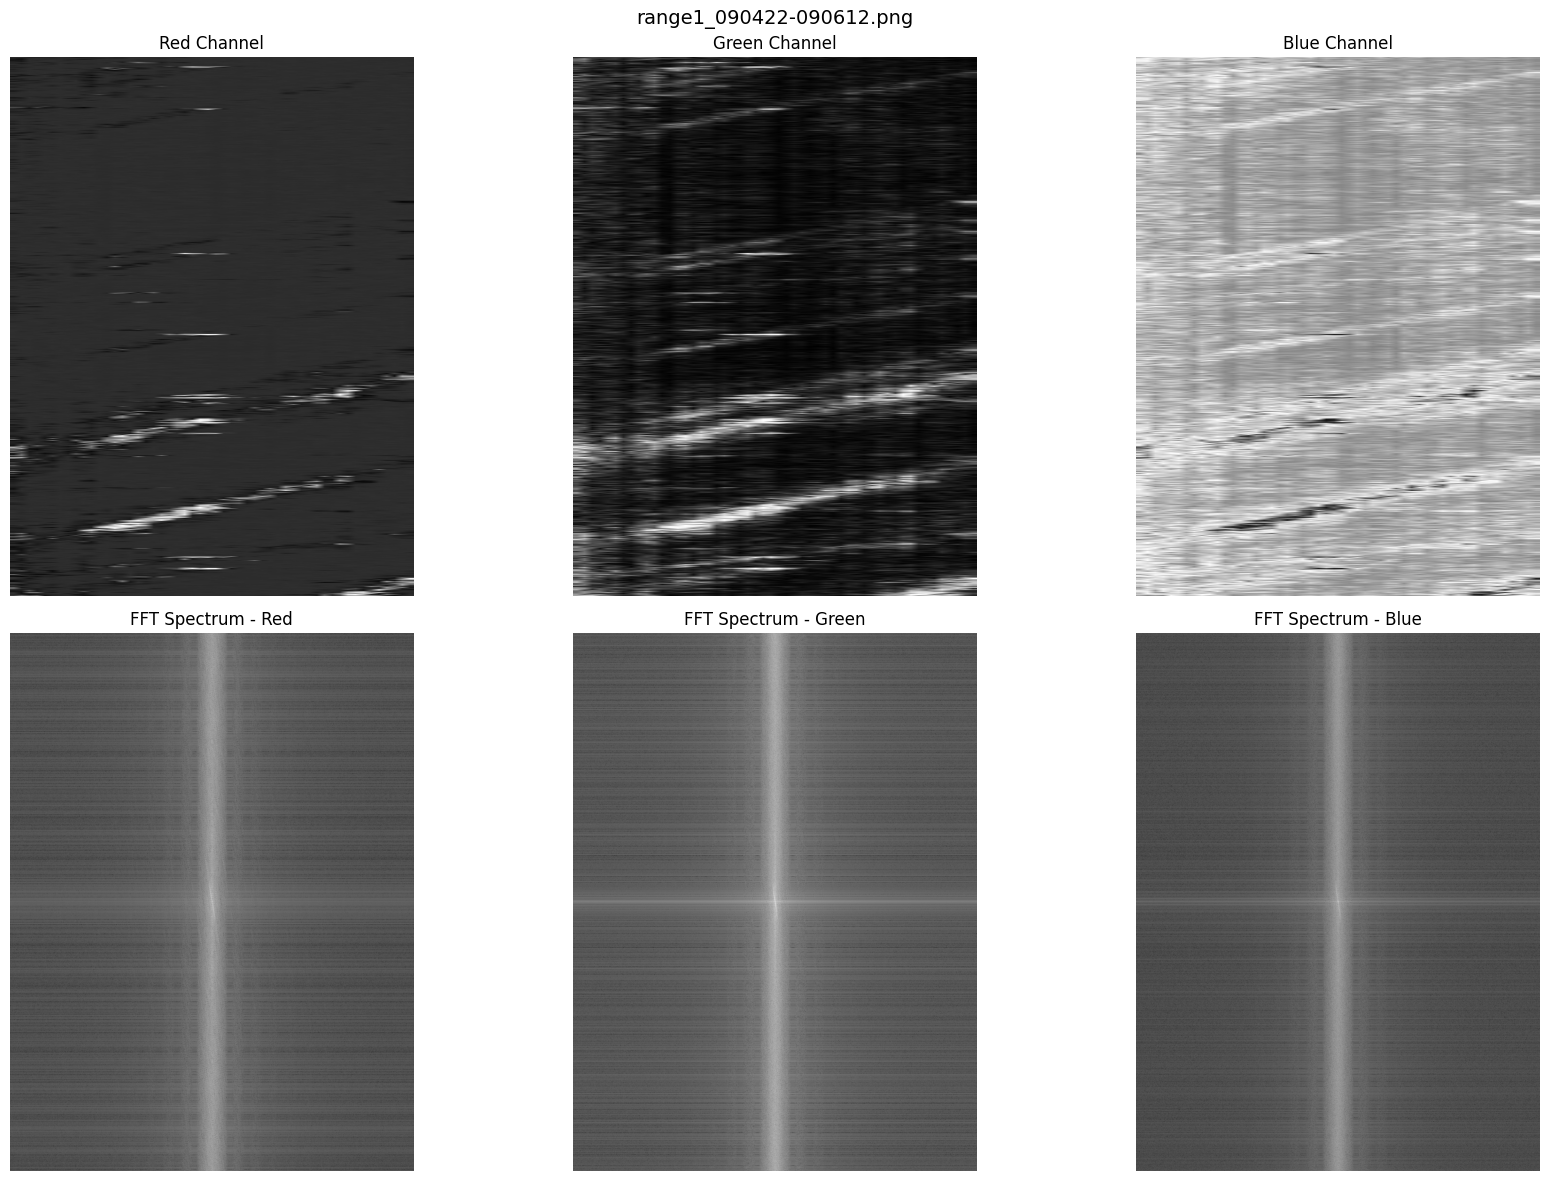

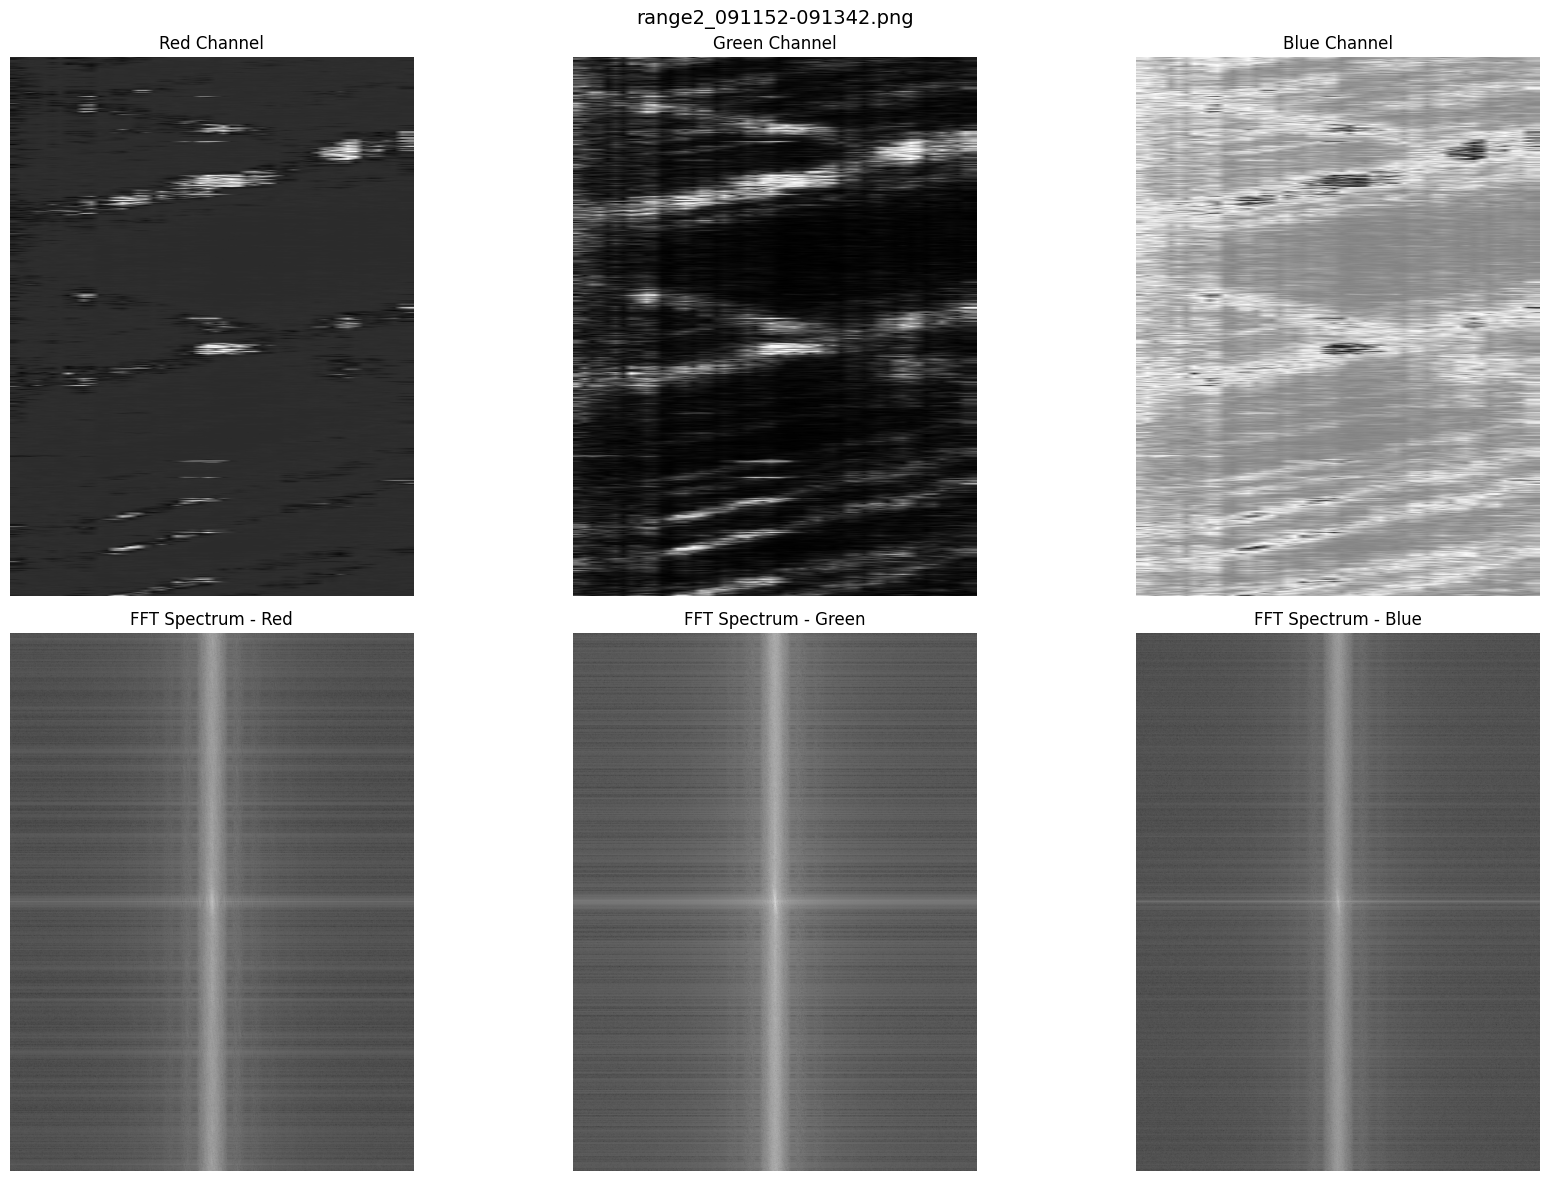

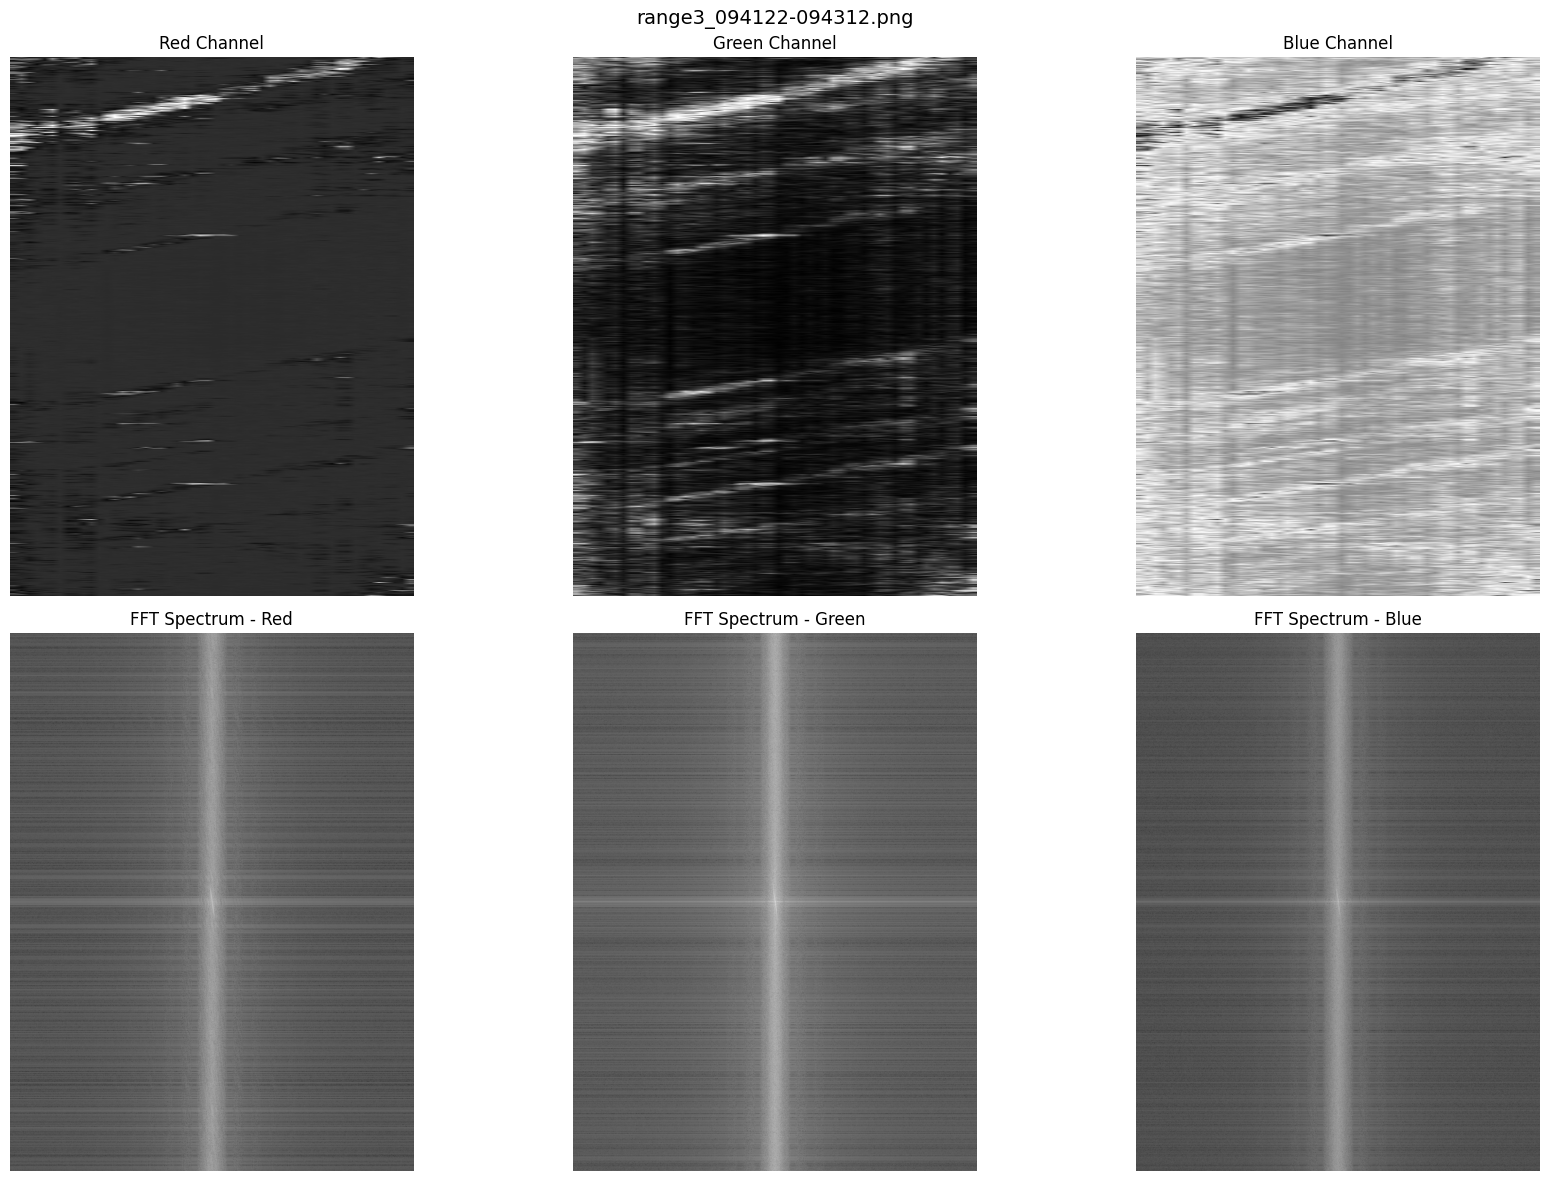

In [92]:
for filename in ['range1_090422-090612.png', 'range2_091152-091342.png', 'range3_094122-094312.png']:
    img = cv2.imread(f'../images/{filename}')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fft_channels = []
    magnitude_spectrums = []
    
    for i in range(3):
        channel = img_rgb[:, :, i].astype(np.float32)
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        magnitude = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)
        magnitude_spectrums.append(magnitude)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    channel_names = ['Red', 'Green', 'Blue']
    for i in range(3):
        axes[0, i].imshow(img_rgb[:, :, i], cmap='gray')
        axes[0, i].set_title(f'{channel_names[i]} Channel')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(magnitude_spectrums[i], cmap='gray')
        axes[1, i].set_title(f'FFT Spectrum - {channel_names[i]}')
        axes[1, i].axis('off')
    
    fig.suptitle(filename, fontsize=14)
    plt.tight_layout()
    plt.show()

### **FFT per DAS channel**

In [93]:
def plot_graph(plot_function, figsize=(8,4), title=None, x_label=None, y_label=None, 
               grid=True, tight=True, legend=False):
    plt.figure(figsize=figsize)
    plot_function()
    
    if title is not None:
        plt.title(title)
    
    if x_label is not None:
        plt.xlabel(x_label)
    
    if y_label is not None:
        plt.ylabel(y_label)
    
    plt.grid(grid)
    
    if (tight):
        plt.tight_layout()
    
    if (legend):
        plt.legend()
        
    plt.show()

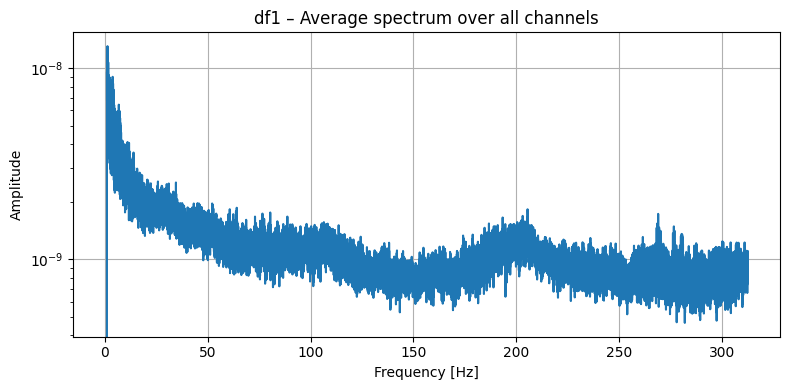

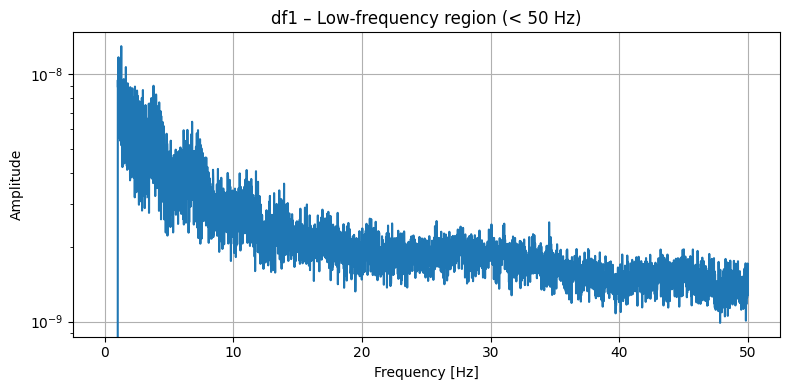

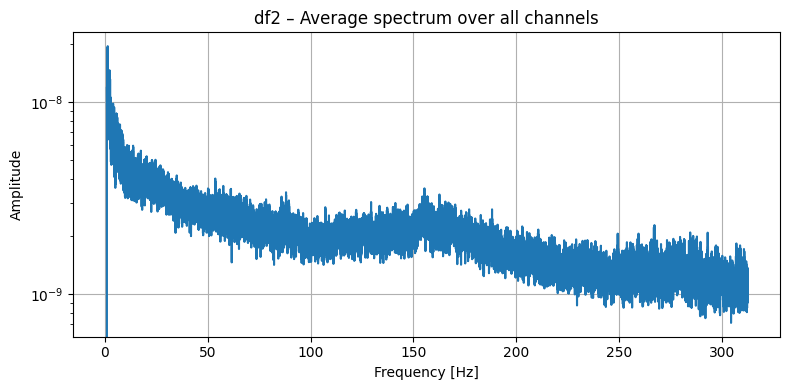

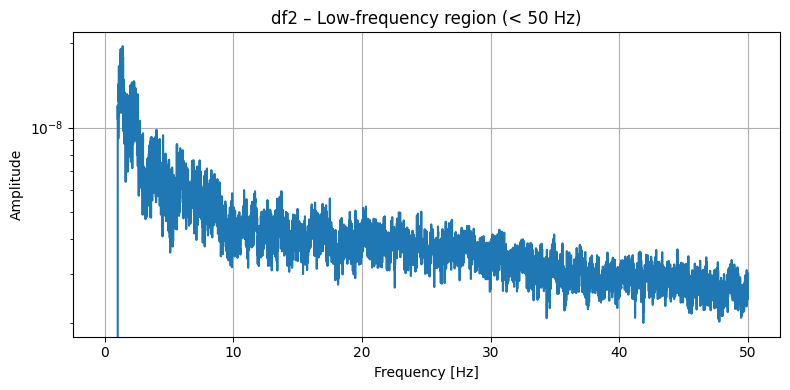

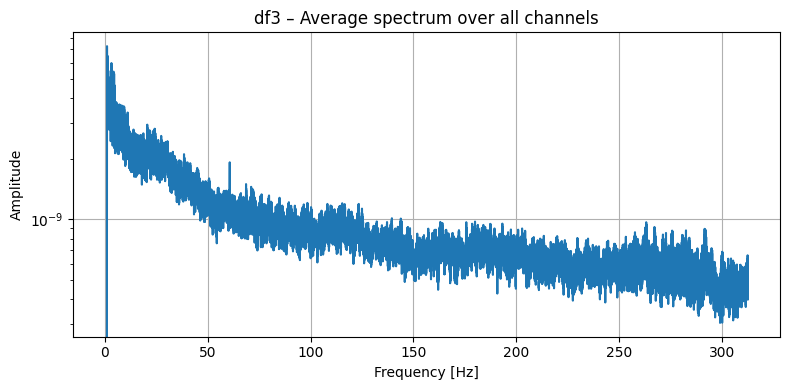

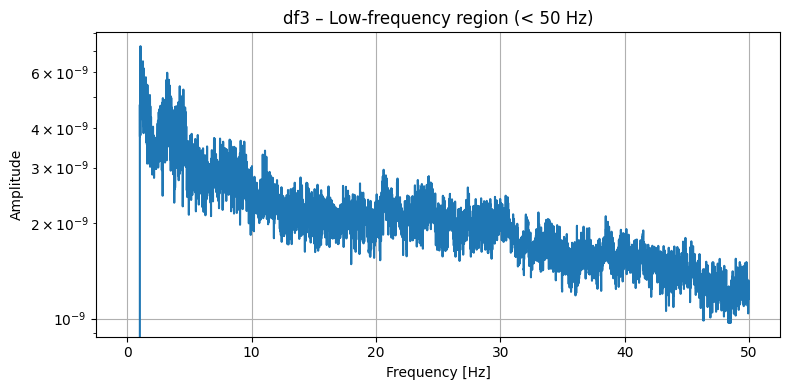

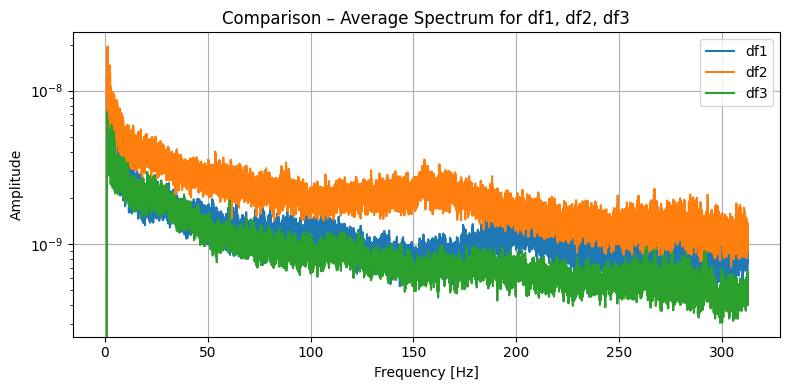

In [94]:
def compute_fft_for_segment(df, f_low = 0, dt=dt):
    data = df.values.astype(np.float64)
    T, C = data.shape
    
    # remove offset
    data -= data.mean(axis=0, keepdims=True)
    
    fft_vals = np.fft.rfft(data, axis=0)
    freqs = np.fft.rfftfreq(T, d=dt)
    
    mask = freqs >= f_low
    
    fft_vals_filtered = fft_vals.copy()
    fft_vals_filtered[~mask, :] = 0.0

    filtered_signal = np.fft.irfft(fft_vals_filtered, n=T, axis=0)

    fft_mag = np.abs(fft_vals_filtered) / (T / 2.0)

    return freqs, fft_mag, filtered_signal

results = {}

for name, df in [("df1", df1), ("df2", df2), ("df3", df3)]:
    freqs, fft_mag, _ = compute_fft_for_segment(df, f_low=1.0)
    results[name] = (freqs, fft_mag)
    
def plot_avg_spectrum(freqs, fft_mag):
    avg_spectrum = fft_mag.mean(axis=1)
    plt.semilogy(freqs, avg_spectrum)

def plot_avg_spectrum_low(freqs, fft_mag, f_max=50):
    avg_spectrum = fft_mag.mean(axis=1)
    mask = freqs < f_max
    plt.semilogy(freqs[mask], avg_spectrum[mask])
    
for name in ["df1", "df2", "df3"]:
    freqs, fft_mag = results[name]

    plot_graph(
        lambda: plot_avg_spectrum(freqs, fft_mag),
        title=f"{name} – Average spectrum over all channels",
        x_label="Frequency [Hz]",
        y_label="Amplitude"
    )

    plot_graph(
        lambda: plot_avg_spectrum_low(freqs, fft_mag, f_max=50),
        title=f"{name} – Low-frequency region (< 50 Hz)",
        x_label="Frequency [Hz]",
        y_label="Amplitude"
    )
    
plot_graph(
    lambda: [
        plt.semilogy(results[name][0], results[name][1].mean(axis=1), label=name)
        for name in ["df1", "df2", "df3"]
    ] or None,
    title="Comparison – Average Spectrum for df1, df2, df3",
    x_label="Frequency [Hz]",
    y_label="Amplitude",
    legend=True
)

### **Filtering noise**

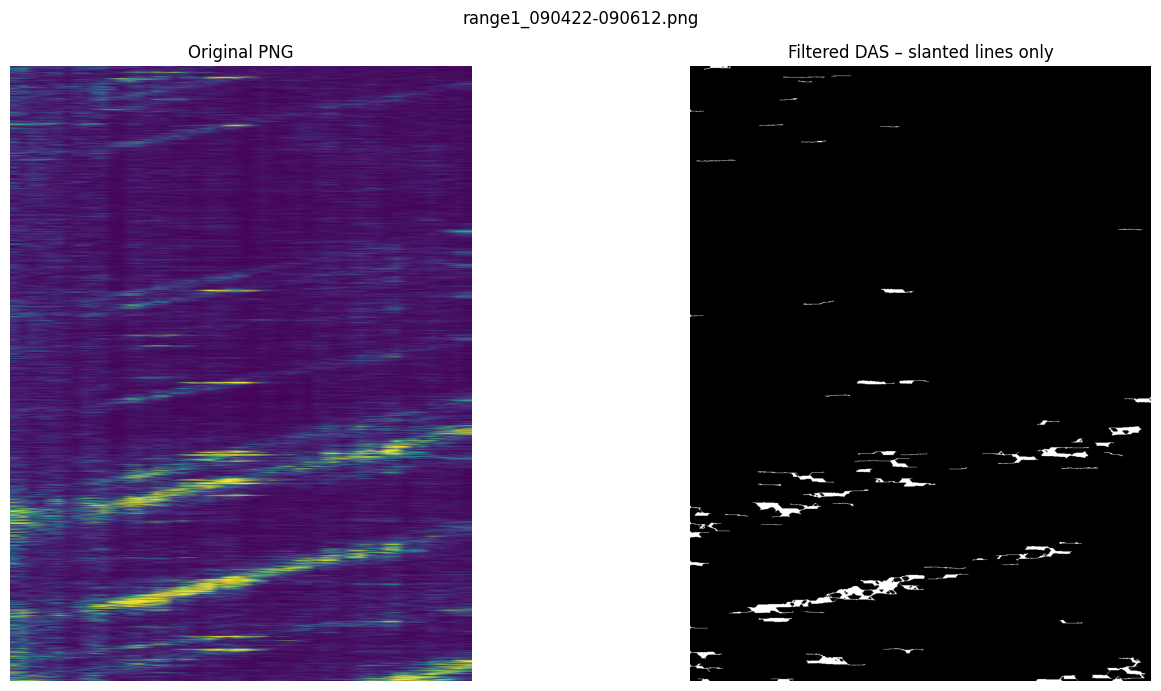

✓ Saved: slanted_only_range1_090422-090612.png


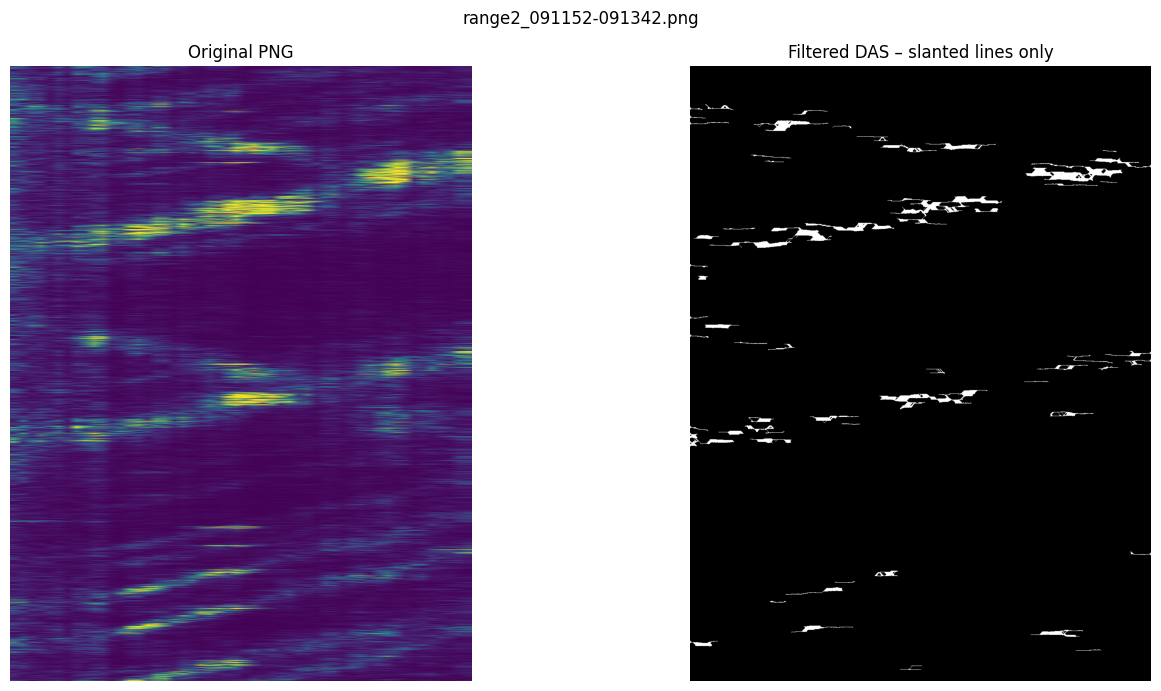

✓ Saved: slanted_only_range2_091152-091342.png


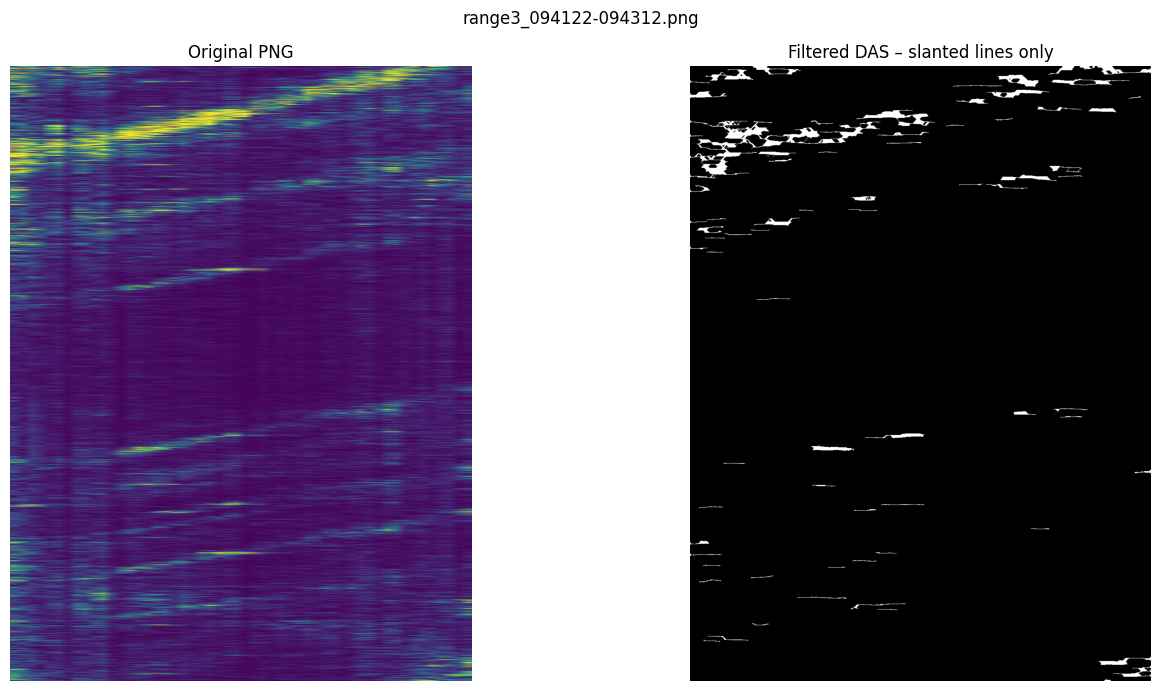

✓ Saved: slanted_only_range3_094122-094312.png


In [145]:
def apply_filters(df, f_low = 1.0, f_high = 40.0, dt=dt):
    """
    Keeps only relevant frequencies
    """
    data = df.values.astype(np.float64)
    T, C = data.shape
    
    data -= data.mean(axis=0, keepdims=True)
    
    fft_vals = np.fft.rfft(data, axis=0)
    freqs = np.fft.rfftfreq(T, d=dt)

    mask = (freqs >= f_low) & (freqs <= f_high)

    fft_filtered = fft_vals * mask[:, None]

    filtered_signal = np.fft.irfft(fft_filtered, n=T, axis=0)

    df_filtered = pd.DataFrame(filtered_signal, index=df.index, columns=df.columns)
    fft_mag_filtered = np.abs(fft_filtered) / (T / 2.0)

    return df_filtered, freqs, fft_mag_filtered

def df_to_image(df, percentile_low=3, percentile_high=99):
    data = df.values.astype(np.float64)

    low, high = np.percentile(data, [percentile_low, percentile_high])
    data_clipped = np.clip(data, low, high)

    data_norm = (data_clipped - low) / (high - low + 1e-9)
    data_img = (255 * data_norm).astype(np.uint8)

    return data_img

def df_to_resized_image(df, target_height, target_width,
                        percentile_low=3, percentile_high=99):
    """
    Converts filtered DAS dataframe to an image and resizes it 
    to match the original PNG dimensions.
    """
    # Convert to raw normalized image
    img = df_to_image(df, percentile_low, percentile_high)

    # Resize to match original PNG shape
    img_resized = cv2.resize(img, (target_width, target_height),
                             interpolation=cv2.INTER_LINEAR)
    
    return img_resized

def extract_slanted_lines(img):
    img = img.astype(np.uint8)
    
    # 1) Smooth in time (vertical) to suppress fast horizontal jitter
    sm = cv2.GaussianBlur(img, (3, 21), 0)
    
    # 2) Edge detection – relatively soft thresholds for your DAS data
    edges = cv2.Canny(sm, 20, 60, apertureSize=3)
    
    # 3) Remove almost-horizontal segments (very long in x, 1 px high)
    kern_h = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    horiz = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kern_h)
    
    # 4) Remove almost-vertical segments (very tall in y, 1 px wide)
    kern_v = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 80))
    vert = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kern_v)
    
    # 5) Keep only diagonals = original edges minus horizontal & vertical
    diag_edges = cv2.subtract(edges, horiz)
    diag_edges = cv2.subtract(diag_edges, vert)
    
    # 6) Connect diagonal strokes with multiple strategies
    
    # Strategy A: Elliptical kernel for general connectivity
    kern_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    diag_connected = cv2.morphologyEx(diag_edges, cv2.MORPH_CLOSE, kern_ellipse, iterations=1)
    
    # Strategy B: Oriented kernels for specific diagonal angles
    # Positive slope diagonal (bottom-left to top-right)
    kern_diag_pos = np.array([[0,0,0,0,1],
                              [0,0,0,1,1],
                              [0,0,1,1,0],
                              [0,1,1,0,0],
                              [1,1,0,0,0]], dtype=np.uint8)
    
    # Negative slope diagonal (top-left to bottom-right)
    kern_diag_neg = np.array([[1,0,0,0,0],
                              [1,1,0,0,0],
                              [0,1,1,0,0],
                              [0,0,1,1,0],
                              [0,0,0,1,1]], dtype=np.uint8)
    
    # Apply oriented closings
    diag_pos = cv2.morphologyEx(diag_edges, cv2.MORPH_CLOSE, kern_diag_pos, iterations=2)
    diag_neg = cv2.morphologyEx(diag_edges, cv2.MORPH_CLOSE, kern_diag_neg, iterations=2)
    
    # Combine all diagonal connections
    diag_combined = cv2.bitwise_or(diag_connected, diag_pos)
    diag_combined = cv2.bitwise_or(diag_combined, diag_neg)
    
    # 7) Optional: Final cleanup to remove small isolated noise
    # Remove small connected components (less than 50 pixels)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(diag_combined, connectivity=8)
    min_size = 50
    diag_final = np.zeros_like(diag_combined)
    for i in range(1, num_labels):  # Skip background (label 0)
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            diag_final[labels == i] = 255
    
    return diag_final



# frequencies after 40 Hz should not be caused by vehicles
df1_filtered, freqs1, fft_mag1 = apply_filters(df1, f_low=1.0, f_high=40.0)
df2_filtered, freqs2, fft_mag2 = apply_filters(df2, f_low=1.0, f_high=40.0)
df3_filtered, freqs3, fft_mag3 = apply_filters(df3, f_low=1.0, f_high=40.0)

line_images = []

for filename, df_filtered in [
    ('range1_090422-090612.png', df1_filtered),
    ('range2_091152-091342.png', df2_filtered),
    ('range3_094122-094312.png', df3_filtered),
]:

    # Load original image to get target dimensions
    img_original = cv2.imread(f'../images/{filename}')
    H, W = img_original.shape[:2]

    # Convert filtered DAS data → resized grayscale image
    img_gray = df_to_resized_image(df_filtered, H, W)
    img_gray = df_to_resized_image(df_filtered, H, W)
    cv2.imwrite("debug_img_gray.png", img_gray) 

    # Extract only slanted lines using your function
    img_lines = extract_slanted_lines(img_gray)

    # Plot comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    axes[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original PNG')
    axes[0].axis('off')

    axes[1].imshow(img_lines, cmap='gray')
    axes[1].set_title('Filtered DAS – slanted lines only')
    axes[1].axis('off')

    fig.suptitle(filename)
    plt.tight_layout()
    plt.show()

    # Save output
    output_name = f'slanted_only_{filename}'
    cv2.imwrite(f'../images/{output_name}', img_lines)
    print(f'✓ Saved: {output_name}')
    line_images.append(img_lines)

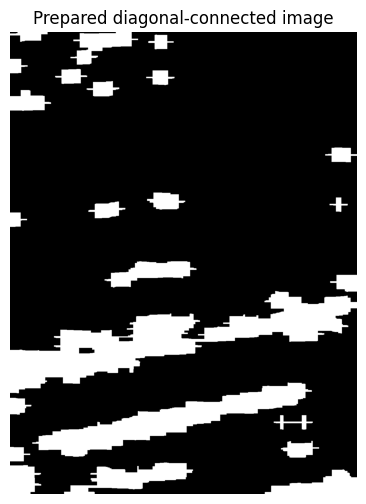

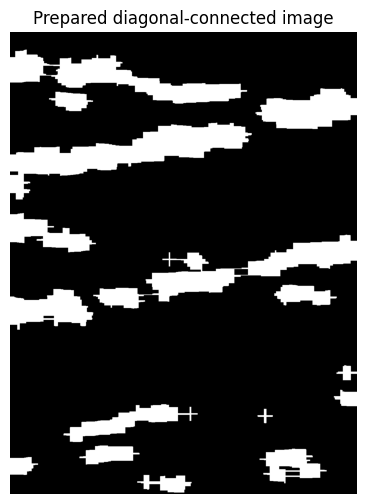

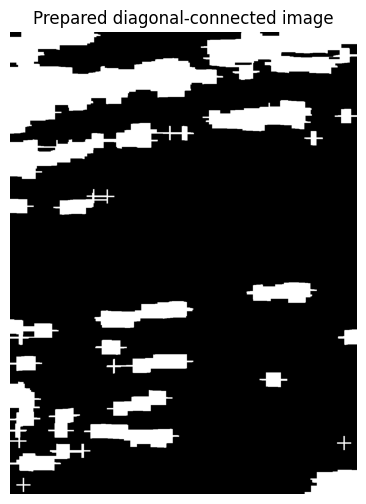

In [140]:
def strengthen_diagonals(img):
    # SEs tuned for 45° and 135° diagonals
    diag1 = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 3))   # /
    diag2 = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 3))   # \

    # rotate second kernel by 90 degrees
    diag2 = cv2.rotate(diag2, cv2.ROTATE_90_CLOCKWISE)

    d1 = cv2.dilate(img, diag1, iterations=2)
    d2 = cv2.dilate(img, diag2, iterations=2)

    return cv2.bitwise_or(d1, d2)


def connect_tracks(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, 7))
    connected = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return connected

prepared_images = []
for img in line_images:
    img_prepared = strengthen_diagonals(img)
    img_prepared = connect_tracks(img_prepared)
    prepared_images.append(img_prepared)
    plt.figure(figsize=(8,6))
    plt.imshow(img_prepared, cmap='gray')
    plt.title("Prepared diagonal-connected image")
    plt.axis('off')
    plt.show()




Processing: range1_090422-090612.png

Resolution Information:
Original DF: 75000 rows × 52 cols
Resized image: 1600 rows × 1200 cols
Time per pixel = 0.075000 s
Space per pixel = 0.221282 m

Found 42 connected components

Component 1: area=541, x_range=77.0

Component 2: area=56, x_range=50.0

Component 3: area=625, x_range=107.0

Component 4: area=75, x_range=46.0

Component 5: area=93, x_range=36.0

Component 6: area=93, x_range=62.0

Component 7: area=64, x_range=49.0

Component 8: area=112, x_range=64.0

Component 9: area=157, x_range=100.0

Component 10: area=99, x_range=62.0

Processing 45 components (including splits)

  Analyzing component 1.0: x_range=77.0, y_range=10.0
    slope=-0.0123, angle=-0.7°, R²=0.016
    Rejected: R² too low

  Analyzing component 2.0: x_range=50.0, y_range=1.0
    Rejected: extent too small

  Analyzing component 3.0: x_range=107.0, y_range=13.0
    slope=0.0134, angle=0.8°, R²=0.004
    Rejected: R² too low

  Analyzing component 4.0: x_range=46.0

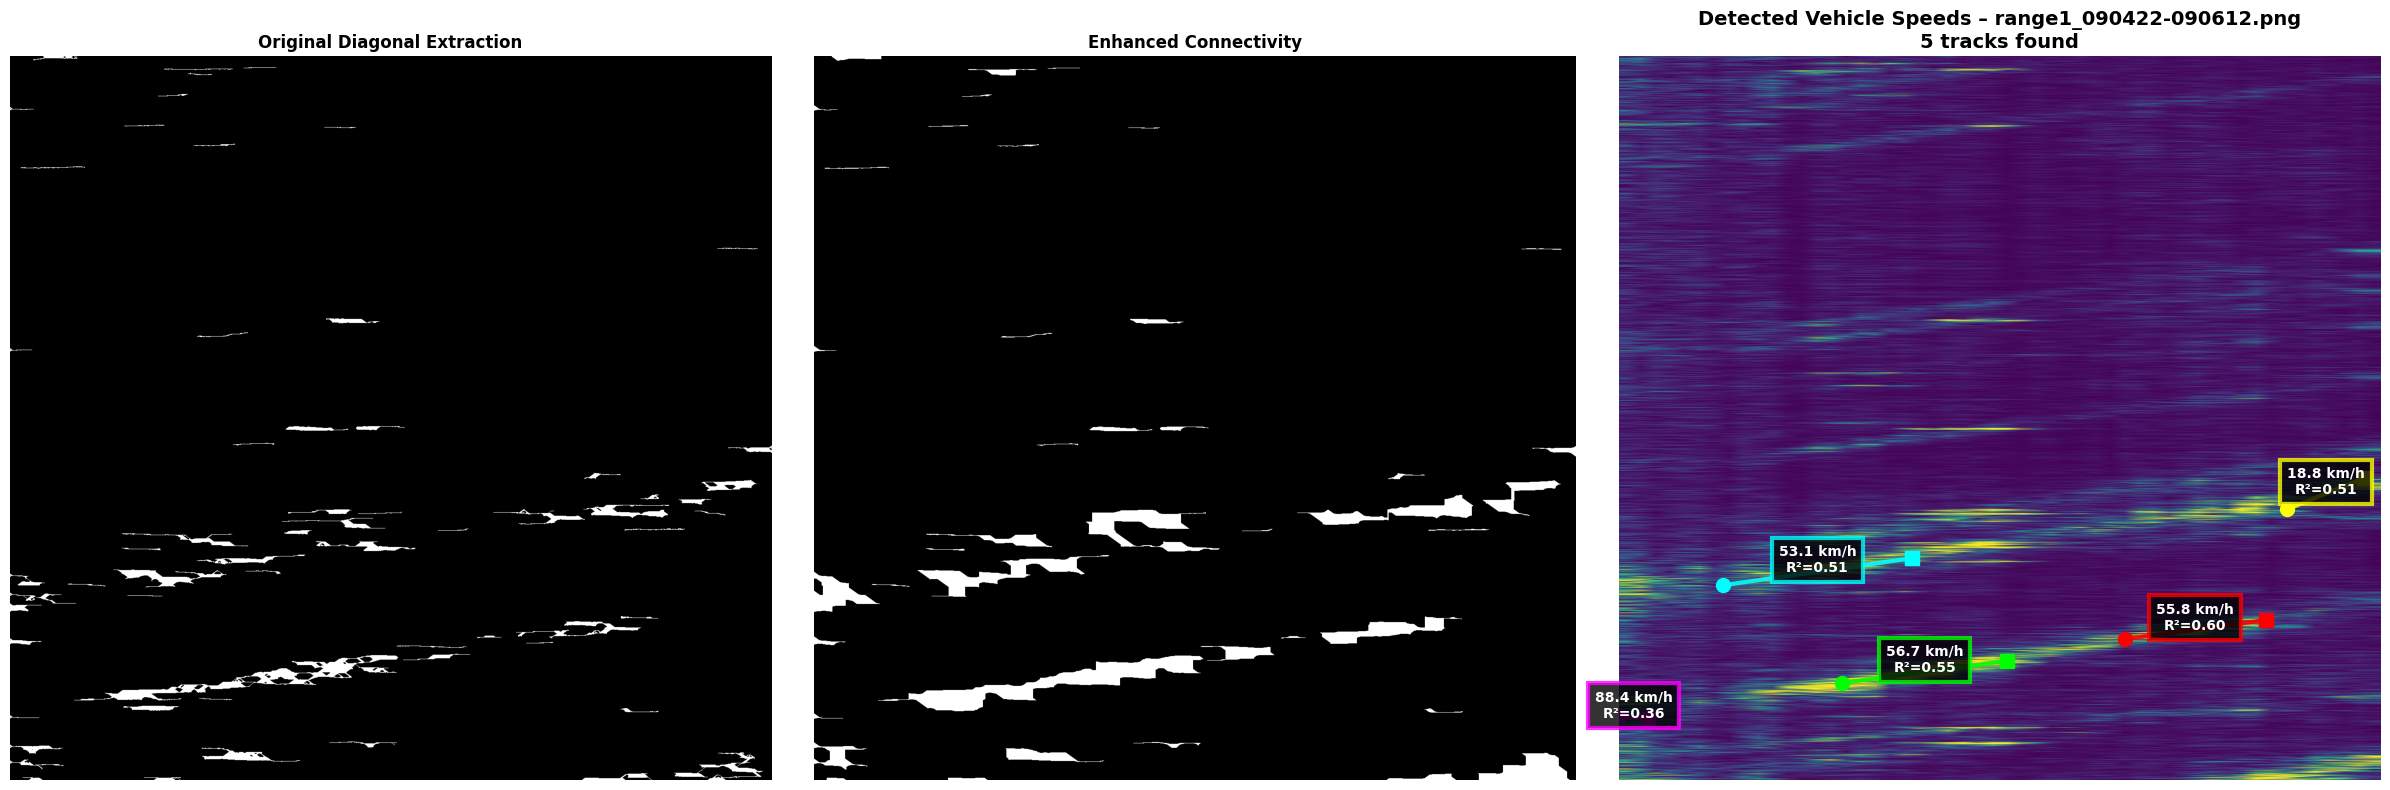


Processing: range2_091152-091342.png

Detected 5 vehicle tracks:
----------------------------------------------------------------------
  Track 1:
    Velocity:   47.55 km/h ( 13.21 m/s)
    R² fit:     0.815
    Length:   225.4 pixels
  Track 2:
    Velocity:   79.34 km/h ( 22.04 m/s)
    R² fit:     0.594
    Length:   47.4 pixels
  Track 3:
    Velocity:   70.72 km/h ( 19.64 m/s)
    R² fit:     0.557
    Length:   302.4 pixels
  Track 4:
    Velocity:  108.82 km/h ( 30.23 m/s)
    R² fit:     0.440
    Length:   53.2 pixels
  Track 5:
    Velocity:  129.41 km/h ( 35.95 m/s)
    R² fit:     0.311
    Length:   156.5 pixels


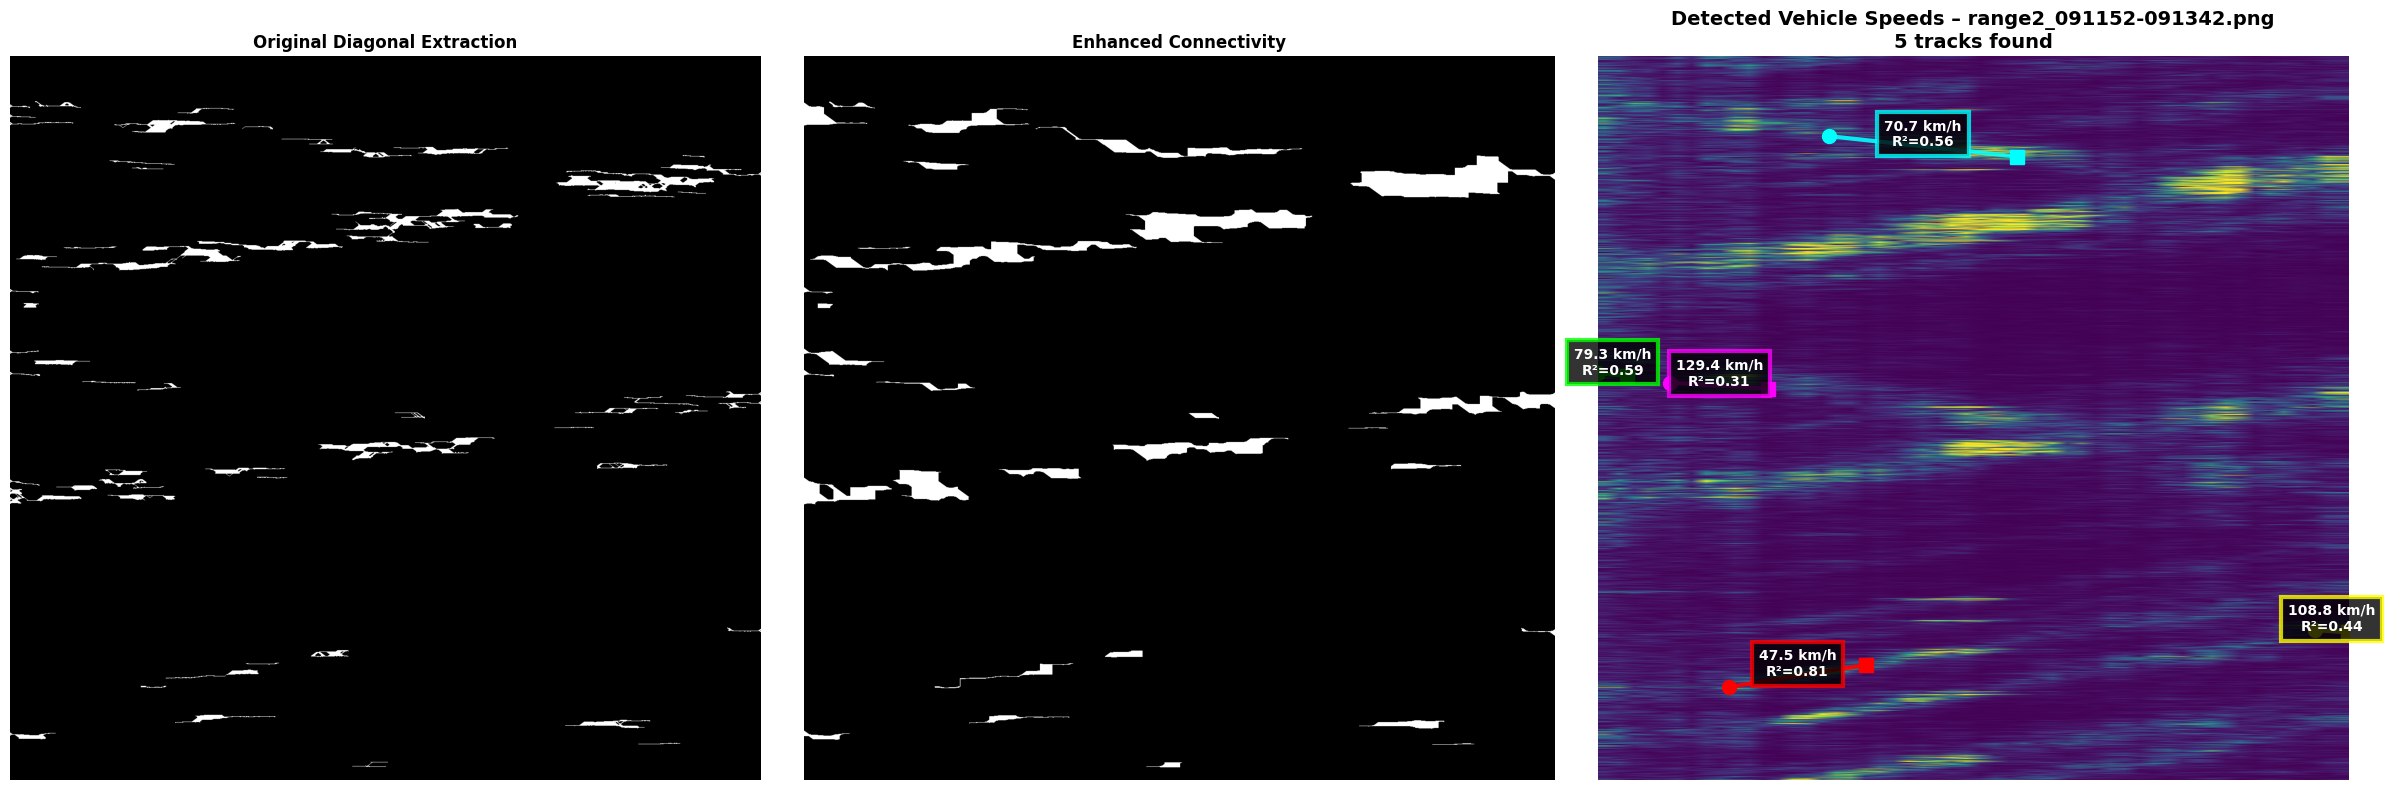


Processing: range3_094122-094312.png

Detected 4 vehicle tracks:
----------------------------------------------------------------------
  Track 1:
    Velocity:   16.25 km/h (  4.51 m/s)
    R² fit:     0.859
    Length:   84.6 pixels
  Track 2:
    Velocity:   56.37 km/h ( 15.66 m/s)
    R² fit:     0.719
    Length:   87.5 pixels
  Track 3:
    Velocity:   58.77 km/h ( 16.32 m/s)
    R² fit:     0.664
    Length:   252.0 pixels
  Track 4:
    Velocity:  195.60 km/h ( 54.33 m/s)
    R² fit:     0.369
    Length:   153.2 pixels


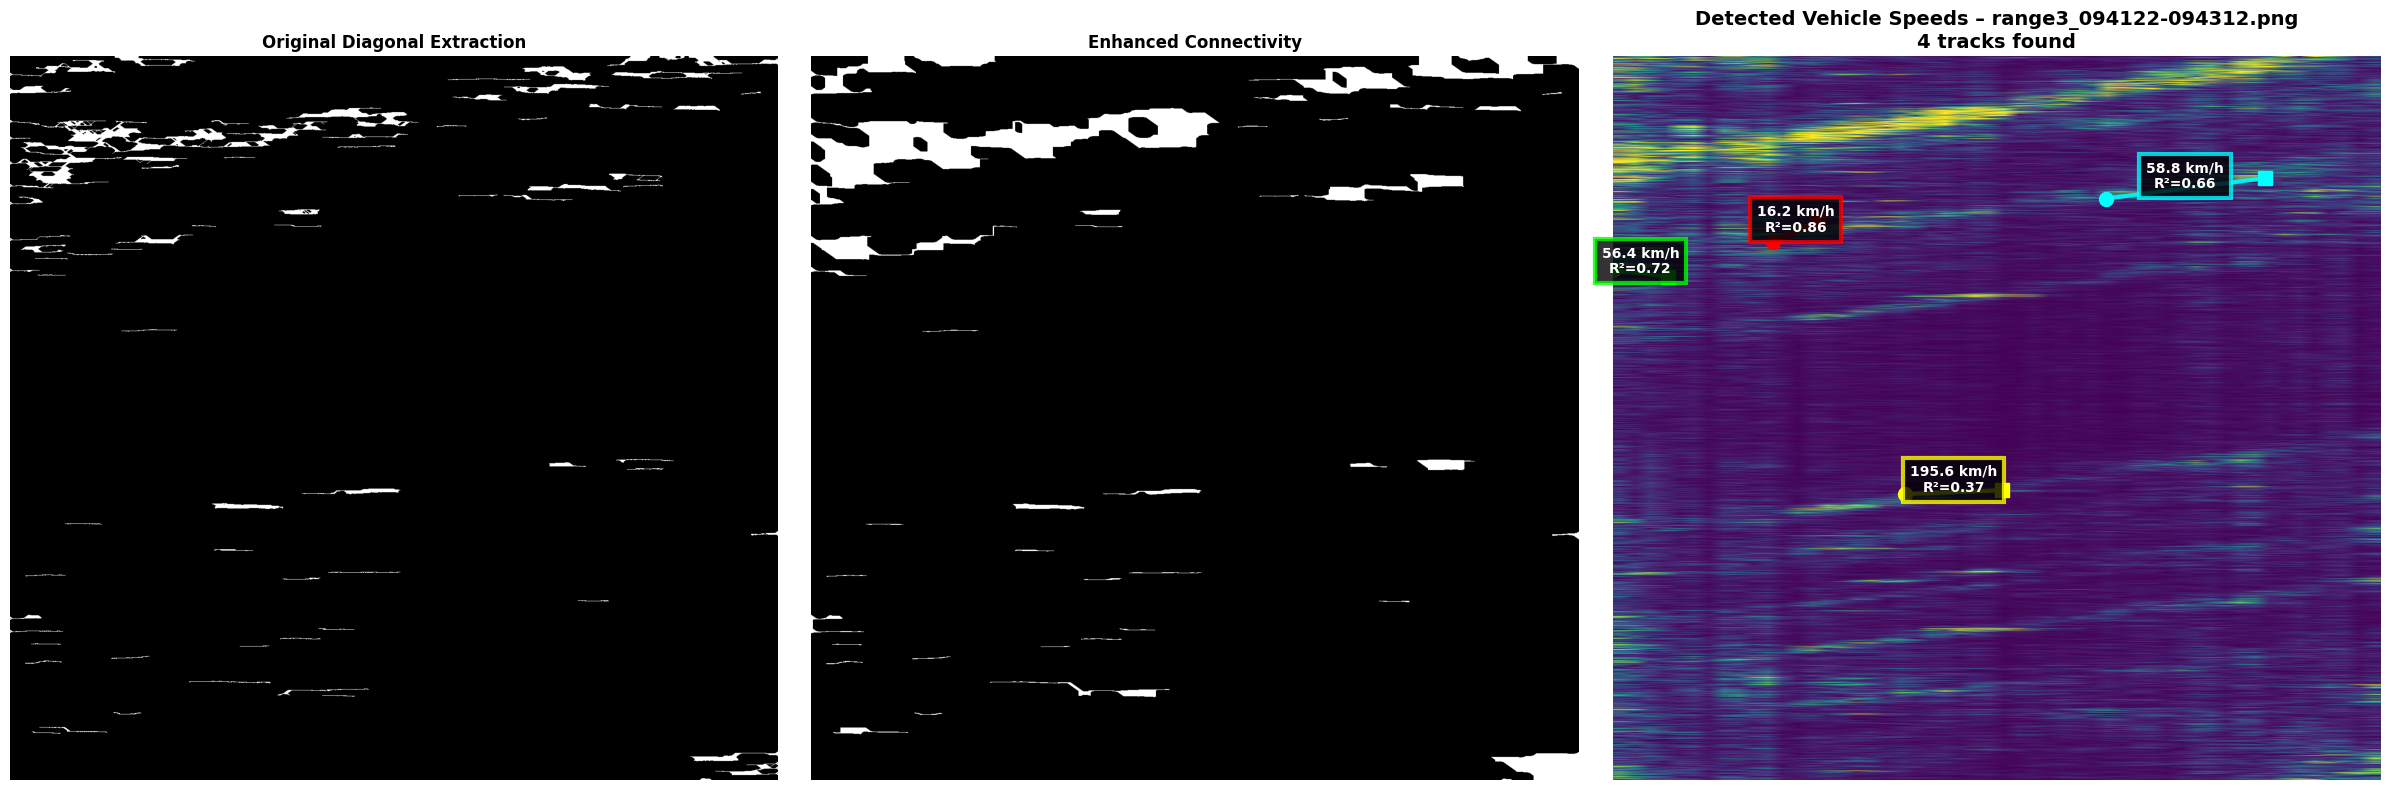

In [158]:
import cv2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def enhance_diagonal_connectivity_balanced(diagonal_mask):
    """
    Balanced connectivity enhancement - connects gaps but avoids over-merging
    """
    # Ensure binary
    if diagonal_mask.max() > 1:
        diagonal_mask = (diagonal_mask > 127).astype(np.uint8) * 255
    
    # Create moderate-sized diagonal kernels
    size = 9
    kern_diag_pos = np.zeros((size, size), dtype=np.uint8)
    for i in range(size):
        for j in range(max(0, i-1), min(size, i+2)):
            if abs((size-1-i) - j) <= 1:
                kern_diag_pos[i, j] = 1
    
    kern_diag_neg = np.zeros((size, size), dtype=np.uint8)
    for i in range(size):
        for j in range(max(0, i-1), min(size, i+2)):
            if abs(i - j) <= 1:
                kern_diag_neg[i, j] = 1
    
    # Apply moderate closing
    enhanced = diagonal_mask.copy()
    
    # Diagonal closing
    enhanced = cv2.morphologyEx(enhanced, cv2.MORPH_CLOSE, kern_diag_pos, iterations=3)
    enhanced = cv2.morphologyEx(enhanced, cv2.MORPH_CLOSE, kern_diag_neg, iterations=3)
    
    # Medium elliptical closing
    kern_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
    enhanced = cv2.morphologyEx(enhanced, cv2.MORPH_CLOSE, kern_ellipse, iterations=1)
    
    # Vertical gap bridging (moderate)
    kern_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 20))
    enhanced = cv2.morphologyEx(enhanced, cv2.MORPH_CLOSE, kern_vertical, iterations=1)
    
    return enhanced


def split_large_component(component_mask, max_width=400):
    """
    Split large horizontally-extended components into sub-regions
    """
    points = np.column_stack(np.where(component_mask > 0))
    if len(points) == 0:
        return []
    
    y_coords = points[:, 0]
    x_coords = points[:, 1]
    
    x_min, x_max = x_coords.min(), x_coords.max()
    x_range = x_max - x_min
    
    # If component is very wide, split it into horizontal bands
    if x_range > max_width:
        num_splits = int(np.ceil(x_range / max_width))
        splits = []
        
        for i in range(num_splits):
            x_start = x_min + i * max_width
            x_end = min(x_start + max_width + 50, x_max + 1)  # Overlap slightly
            
            mask_slice = component_mask.copy()
            mask_slice[:, :int(x_start)] = 0
            mask_slice[:, int(x_end):] = 0
            
            if mask_slice.sum() > 0:
                splits.append(mask_slice)
        
        return splits
    else:
        return [component_mask]


def calculate_velocities_with_splitting(diagonal_mask, df, debug=True):
    """
    Calculate velocities with component splitting for large merged regions
    """
    
    # Balanced connectivity enhancement
    enhanced_mask = enhance_diagonal_connectivity_balanced(diagonal_mask)
    
    # Get resolution
    img_height, img_width = enhanced_mask.shape
    df_rows = len(df.index)
    df_cols = len(df.columns)
    dt_original = (df.index[1] - df.index[0]).total_seconds()
    dx_original = df.columns[1] - df.columns[0]
    total_time = df_rows * dt_original
    total_space = df_cols * dx_original
    time_per_pixel = total_time / img_height
    space_per_pixel = total_space / img_width
    
    if debug:
        print("\n" + "="*70)
        print("Resolution Information:")
        print("="*70)
        print(f"Original DF: {df_rows} rows × {df_cols} cols")
        print(f"Resized image: {img_height} rows × {img_width} cols")
        print(f"Time per pixel = {time_per_pixel:.6f} s")
        print(f"Space per pixel = {space_per_pixel:.6f} m")
        print("="*70)
    
    # Find connected components
    num_labels, labels, stats_cc, centroids = cv2.connectedComponentsWithStats(
        enhanced_mask, connectivity=8
    )
    
    if debug:
        print(f"\nFound {num_labels - 1} connected components")
    
    tracks = []
    min_size = 50
    min_x_range = 30
    min_y_range = 10
    
    # Process each component
    components_to_process = []
    
    for i in range(1, num_labels):
        area = stats_cc[i, cv2.CC_STAT_AREA]
        
        if area < min_size:
            continue
        
        component_mask = (labels == i).astype(np.uint8)
        
        # Check component width
        points = np.column_stack(np.where(component_mask > 0))
        if len(points) == 0:
            continue
        
        x_coords = points[:, 1]
        x_range = x_coords.max() - x_coords.min()
        
        if debug and i <= 10:
            print(f"\nComponent {i}: area={area}, x_range={x_range:.1f}")
        
        # If very wide, split it
        if x_range > 300:
            if debug and i <= 10:
                print(f"  -> Splitting wide component")
            splits = split_large_component(component_mask, max_width=250)
            for split_idx, split_mask in enumerate(splits):
                if debug and i <= 10:
                    print(f"     Split {split_idx + 1}/{len(splits)}")
                components_to_process.append((i, split_idx, split_mask))
        else:
            components_to_process.append((i, 0, component_mask))
    
    if debug:
        print(f"\nProcessing {len(components_to_process)} components (including splits)")
    
    # Analyze each component/split
    for comp_idx, (i, split_idx, component_mask) in enumerate(components_to_process):
        
        points = np.column_stack(np.where(component_mask > 0))
        
        if len(points) < 10:
            continue
        
        y_coords = points[:, 0]
        x_coords = points[:, 1]
        
        x_range = x_coords.max() - x_coords.min()
        y_range = y_coords.max() - y_coords.min()
        
        if debug and comp_idx < 15:
            print(f"\n  Analyzing component {i}.{split_idx}: x_range={x_range:.1f}, y_range={y_range:.1f}")
        
        if x_range < min_x_range or y_range < min_y_range:
            if debug and comp_idx < 15:
                print(f"    Rejected: extent too small")
            continue
        
        # Fit line
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_coords, y_coords)
        except:
            if debug and comp_idx < 15:
                print(f"    Rejected: regression failed")
            continue
        
        r_squared = r_value ** 2
        angle_deg = np.degrees(np.arctan(slope))
        
        if debug and comp_idx < 15:
            print(f"    slope={slope:.4f}, angle={angle_deg:.1f}°, R²={r_squared:.3f}")
        
        # Relaxed thresholds
        if r_squared < 0.3:
            if debug and comp_idx < 15:
                print(f"    Rejected: R² too low")
            continue
        
        if abs(angle_deg) < 2 or abs(angle_deg) > 88:
            if debug and comp_idx < 15:
                print(f"    Rejected: angle not diagonal")
            continue
        
        # Calculate velocity
        if abs(slope) < 0.0001:
            if debug and comp_idx < 15:
                print(f"    Rejected: slope too small")
            continue
        
        velocity_pixels = 1.0 / slope
        velocity_ms = velocity_pixels * space_per_pixel / time_per_pixel
        velocity_kmh = velocity_ms * 3.6
        
        if debug and comp_idx < 15:
            print(f"    velocity={velocity_kmh:.2f} km/h")
        
        if abs(velocity_kmh) < 5 or abs(velocity_kmh) > 250:
            if debug and comp_idx < 15:
                print(f"    Rejected: unrealistic velocity")
            continue
        
        # Get endpoints
        x_min, x_max = int(x_coords.min()), int(x_coords.max())
        y_min = int(slope * x_min + intercept)
        y_max = int(slope * x_max + intercept)
        
        y_min = max(0, min(img_height - 1, y_min))
        y_max = max(0, min(img_height - 1, y_max))
        x_min = max(0, min(img_width - 1, x_min))
        x_max = max(0, min(img_width - 1, x_max))
        
        if debug and comp_idx < 15:
            print(f"    ✓ ACCEPTED")
        
        tracks.append((x_min, y_min, x_max, y_max, velocity_kmh, r_squared))
    
    # Remove duplicate/overlapping tracks
    tracks = remove_overlapping_tracks(tracks, overlap_threshold=0.5)
    
    # Sort by R²
    tracks.sort(key=lambda x: x[5], reverse=True)
    
    return tracks, enhanced_mask


def remove_overlapping_tracks(tracks, overlap_threshold=0.5):
    """
    Remove tracks that significantly overlap, keeping the one with better R²
    """
    if len(tracks) <= 1:
        return tracks
    
    # Sort by R² (best first)
    tracks_sorted = sorted(tracks, key=lambda x: x[5], reverse=True)
    
    filtered = []
    
    for track in tracks_sorted:
        x1, y1, x2, y2, v, r2 = track
        
        # Check overlap with already accepted tracks
        overlaps = False
        for accepted in filtered:
            ax1, ay1, ax2, ay2, av, ar2 = accepted
            
            # Calculate horizontal overlap
            overlap_x_start = max(x1, ax1)
            overlap_x_end = min(x2, ax2)
            overlap_x = max(0, overlap_x_end - overlap_x_start)
            
            len_current = x2 - x1
            len_accepted = ax2 - ax1
            
            if overlap_x > 0:
                overlap_ratio = overlap_x / min(len_current, len_accepted)
                
                if overlap_ratio > overlap_threshold:
                    overlaps = True
                    break
        
        if not overlaps:
            filtered.append(track)
    
    return filtered


def plot_tracks_on_png_v3(filename, tracks, diagonal_mask=None, enhanced_mask=None):
    """
    Plot detected tracks
    """
    img = cv2.imread(f"../images/{filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    n_plots = 1 + (diagonal_mask is not None) + (enhanced_mask is not None)
    fig, axes = plt.subplots(1, n_plots, figsize=(8*n_plots, 8))
    
    if n_plots == 1:
        axes = [axes]
    
    plot_idx = 0
    
    if diagonal_mask is not None:
        axes[plot_idx].imshow(diagonal_mask, cmap='gray', aspect='auto')
        axes[plot_idx].set_title('Original Diagonal Extraction', fontsize=12, weight='bold')
        axes[plot_idx].axis('off')
        plot_idx += 1
    
    if enhanced_mask is not None:
        axes[plot_idx].imshow(enhanced_mask, cmap='gray', aspect='auto')
        axes[plot_idx].set_title('Enhanced Connectivity', fontsize=12, weight='bold')
        axes[plot_idx].axis('off')
        plot_idx += 1
    
    ax_result = axes[plot_idx]
    ax_result.imshow(img, aspect='auto')
    
    colors = ['red', 'lime', 'cyan', 'yellow', 'magenta', 'orange', 
              'white', 'pink', 'lightblue', 'gold', 'lightgreen', 'coral']
    
    for idx, track in enumerate(tracks):
        x1, y1, x2, y2, v, r2 = track
        color = colors[idx % len(colors)]
        
        ax_result.plot([x1, x2], [y1, y2], color=color, linewidth=3, alpha=0.9)
        ax_result.plot(x1, y1, 'o', color=color, markersize=10)
        ax_result.plot(x2, y2, 's', color=color, markersize=10)
        
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2
        
        text = f"{abs(v):.1f} km/h\nR²={r2:.2f}"
        ax_result.text(
            mid_x, mid_y, text,
            color='white', fontsize=10, weight='bold', ha='center',
            bbox=dict(facecolor='black', alpha=0.8, edgecolor=color, linewidth=3, pad=5)
        )
    
    ax_result.set_title(f"Detected Vehicle Speeds – {filename}\n{len(tracks)} tracks found", 
                        fontsize=14, weight='bold')
    ax_result.axis('off')
    
    plt.tight_layout()
    plt.show()


def analyze_all_images(test_data, line_images):
    """
    Main analysis function
    """
    all_results = []
    
    for idx, ((filename, df_filtered), raw_lines) in enumerate(zip(test_data, line_images)):
        print("\n" + "="*70)
        print(f"Processing: {filename}")
        print("="*70)
        
        debug = (idx == 0)
        
        tracks, enhanced_mask = calculate_velocities_with_splitting(
            raw_lines, df_filtered, debug=debug
        )
        
        print(f"\nDetected {len(tracks)} vehicle tracks:")
        print("-" * 70)
        
        for track_idx, track in enumerate(tracks, 1):
            x1, y1, x2, y2, v, r2 = track
            print(f"  Track {track_idx}:")
            print(f"    Velocity: {abs(v):>7.2f} km/h ({abs(v)/3.6:>6.2f} m/s)")
            print(f"    R² fit:   {r2:>7.3f}")
            print(f"    Length:   {np.sqrt((x2-x1)**2 + (y2-y1)**2):.1f} pixels")
        
        plot_tracks_on_png_v3(filename, tracks, diagonal_mask=raw_lines, enhanced_mask=enhanced_mask)
        
        all_results.append({'filename': filename, 'tracks': tracks, 'num_tracks': len(tracks)})
    
    return all_results


# Run
test_data = [
    ('range1_090422-090612.png', df1_filtered),
    ('range2_091152-091342.png', df2_filtered),
    ('range3_094122-094312.png', df3_filtered),
]

results = analyze_all_images(test_data, line_images)

### **Process Data**

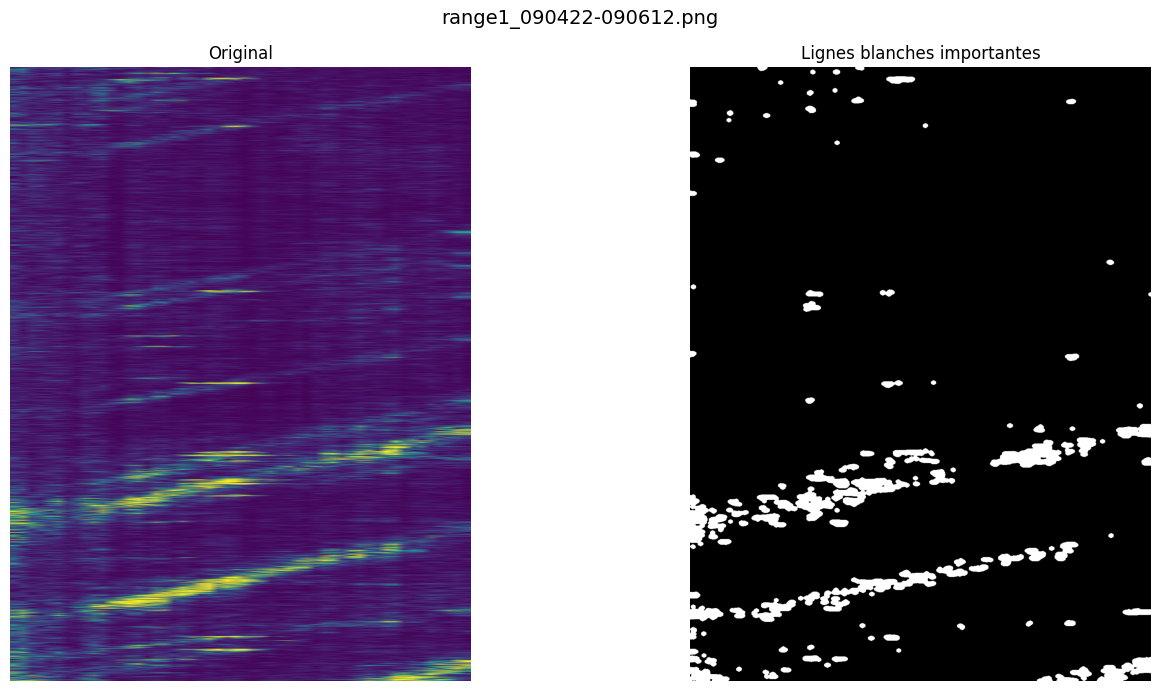

✓ Saved: filtered_range1_090422-090612.png


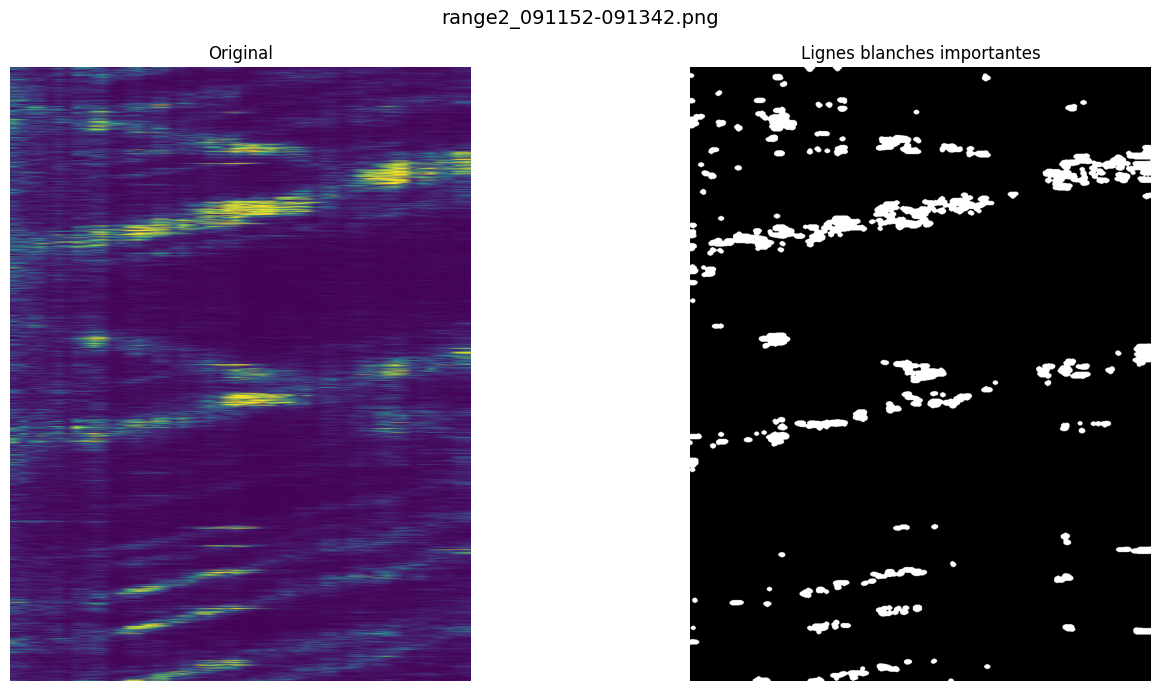

✓ Saved: filtered_range2_091152-091342.png


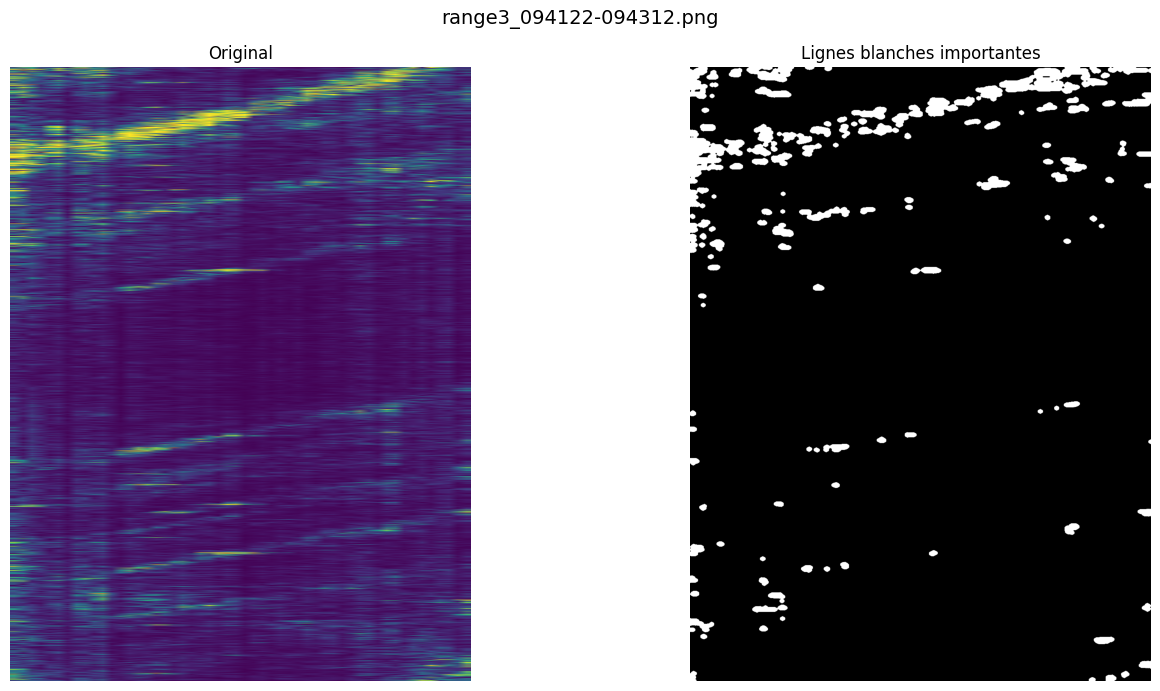

✓ Saved: filtered_range3_094122-094312.png


In [97]:
for filename in ['range1_090422-090612.png', 'range2_091152-091342.png', 'range3_094122-094312.png']:
    img = cv2.imread(f'../images/{filename}')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    filtered_channels = []
    
    for i in range(3):
        channel = img_rgb[:, :, i].astype(np.float32)
        
        # 1. Filtre passe-haut FFT pour isoler les détails
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        
        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2

        mask = np.ones((rows, cols, 2), np.uint8)
        radius = min(rows, cols) // 2  # Filtre plus sélectif
        cv2.circle(mask, (ccol, crow), radius, (0, 0), -1)
        
        fshift_filtered = dft_shift * mask
        
        f_ishift = np.fft.ifftshift(fshift_filtered)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
        
        img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        filtered_channels.append(img_back)
    
    img_filtered = np.stack(filtered_channels, axis=2)
    img_filtered_gray = cv2.cvtColor(img_filtered, cv2.COLOR_RGB2GRAY)
    
    # 2. Seuillage pour ne garder que les lignes les plus intenses
    threshold_value = np.percentile(img_filtered_gray[img_filtered_gray > 0], 85)
    _, img_binary = cv2.threshold(img_filtered_gray, threshold_value, 255, cv2.THRESH_BINARY)
    
    # 3. Morphological operations: close -> open -> close avec nettoyage renforcé
    struct_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    struct_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    
    # Première passe avec petit noyau pour nettoyer les petites impuretés
    img_space_close = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, struct_small)
    img_space_open = cv2.morphologyEx(img_space_close, cv2.MORPH_OPEN, struct_large, iterations=2)
    img_cleaned = cv2.morphologyEx(img_space_open, cv2.MORPH_CLOSE, struct_small)

    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(img_cleaned, cmap='gray')
    axes[1].set_title('Lignes blanches importantes')
    axes[1].axis('off')
    
    fig.suptitle(filename, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    cv2.imwrite(f'../images/filtered_{filename}', img_cleaned)
    print(f'✓ Saved: filtered_{filename}')
